# Analysis of ICSE Research Track Publications by Replicability & AI Use (2023 & 2024)

# Imports & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
        
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# Load Results
df_23 = pd.read_csv('results/bib/ICSE2023_papers.csv')
df_24 = pd.read_csv('results/bib/ICSE2024_papers.csv')

In [3]:
df_23.head()

,title,authors,url,abstract,artifact_available,artifact_reusable,artifact_functional,ai
0,Log Parsing with Prompt-Based Few-Shot Learning,"Le, Van-Hoang, Zhang, Hongyu",https://doi.org/10.1109/ICSE48619.2023.00204,Logs generated by large-scale software systems...,False,False,False,True
1,Context-Aware Bug Reproduction for Mobile Apps,"Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...",https://doi.org/10.1109/ICSE48619.2023.00196,Bug reports are vital for software maintenance...,False,False,False,True
2,Vulnerability Detection with Graph Simplificat...,"Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...",https://doi.org/10.1109/ICSE48619.2023.00191,Prior studies have demonstrated the effectiven...,False,False,False,False
3,DIVER: Oracle-Guided SMT Solver Testing with U...,"Kim, Jongwook, So, Sunbeom, Oh, Hakjoo",https://doi.org/10.1109/ICSE48619.2023.00187,"We present DIVER, a novel technique for effect...",True,True,False,False
4,On the Robustness of Code Generation Technique...,"Mastropaolo, Antonio, Pascarella, Luca, Guglie...",https://doi.org/10.1109/ICSE48619.2023.00181,Software engineering research has always being...,False,False,False,False


# Overall Summary

In [4]:
def conference_overview(df, title):
    """
    Print a summary of the conference data.
    """
    print(title)
    print("------------------------")
    print(f"Total papers: {len(df)}\n")
    print(df["ai"].value_counts())
    print()
    print(df["artifact_available"].value_counts())

    papers_with_artifacts = df[df["artifact_available"]]
    print(f"\nOf {len(papers_with_artifacts)} papers with available artifacts:")
    print(f"{papers_with_artifacts['artifact_reusable'].sum()} reusable artifacts")
    print(f"{papers_with_artifacts['artifact_functional'].sum()} functional artifacts\n\n")

In [5]:
conference_overview(df_23, "Overview for ICSE 2023")
conference_overview(df_24, "Overview for ICSE 2024")

Overview for ICSE 2023
------------------------
Total papers: 211

ai
False    159
True      52
Name: count, dtype: int64

artifact_available
False    131
True      80
Name: count, dtype: int64

Of 80 papers with available artifacts:
51 reusable artifacts
13 functional artifacts


Overview for ICSE 2024
------------------------
Total papers: 238

ai
False    144
True      94
Name: count, dtype: int64

artifact_available
False    159
True      79
Name: count, dtype: int64

Of 79 papers with available artifacts:
63 reusable artifacts
2 functional artifacts




# Word Cloud of AI Abstracts

In [6]:
def create_wordcloud_with_ngrams(df, title="Word Cloud", use_bigrams=False):
    """
    Create a word cloud from abstracts using either unigrams OR bigrams.
    
    Parameters:
    - use_bigrams: If True, creates bigram word cloud. If False, creates unigram word cloud.
    """
    # Filter for AI papers
    # TODO: Update condition when relevant papers are selected
    ai_papers = df[df["ai"] == True]
    
    # Combine all abstracts into one text
    all_abstracts = " ".join(ai_papers["abstract"].astype(str))
    
    # Get standard English stopwords
    sw = set(stopwords.words('english'))
    
    # Tokenize and clean (common for both branches)
    tokens = word_tokenize(all_abstracts.lower())
    clean_tokens = [token for token in tokens if token.isalpha() and len(token) > 2 and token not in sw]
    
    if use_bigrams:
        # Generate bigrams
        bigram_list = list(bigrams(clean_tokens))
        bigram_strings = [f"{word1}_{word2}" for word1, word2 in bigram_list]
        
        # Count bigram frequencies
        word_freq = Counter(bigram_strings)
        
        # Create text for word cloud
        wordcloud_text = []
        for bigram, freq in word_freq.items():
            wordcloud_text.extend([bigram] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
        
    else:
        # For unigrams - use clean tokens
        word_freq = Counter(clean_tokens)
        
        # Create text for word cloud
        wordcloud_text = []
        for word, freq in word_freq.items():
            wordcloud_text.extend([word] * freq)
        
        wordcloud_input = " ".join(wordcloud_text)
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        stopwords=set(),  # No additional stopwords needed since we pre-filtered
        max_words=100,
        relative_scaling=0.5,
        colormap='viridis',
        collocations=False
    ).generate(wordcloud_input)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print top terms
    gram_type = "bigrams" if use_bigrams else "unigrams"
    print(f"\nTop 20 most frequent {gram_type} in {len(ai_papers)} AI paper abstracts:")
    for term, count in word_freq.most_common(20):
        print(f"{term}: {count}")
    
    return word_freq

## Unigram Word Clouds

ICSE 2023 AI Papers Word Cloud (Unigrams):


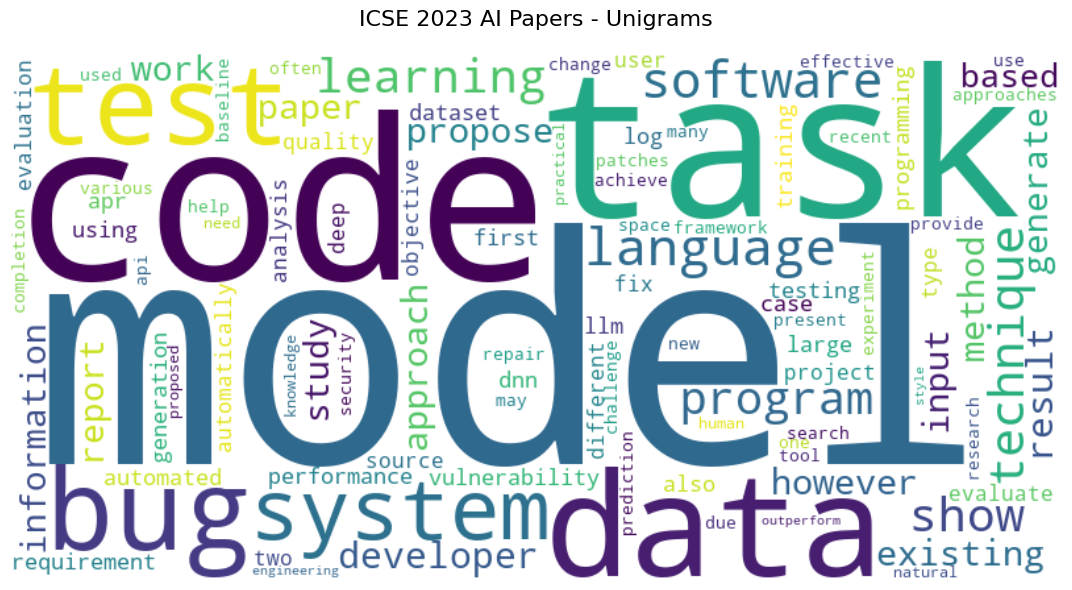


Top 20 most frequent unigrams in 52 AI paper abstracts:
code: 72
models: 62
data: 54
software: 47
model: 46
test: 45
systems: 40
learning: 40
language: 40
tasks: 38
existing: 31
however: 30
bug: 30
techniques: 29
paper: 28
propose: 28
results: 28
approach: 28
show: 26
developers: 26


In [7]:
# Create unigram word clouds
print("ICSE 2023 AI Papers Word Cloud (Unigrams):")
freq_2023_unigrams = create_wordcloud_with_ngrams(df_23, "ICSE 2023 AI Papers - Unigrams", use_bigrams=False)

ICSE 2024 AI Papers Word Cloud (Unigrams):


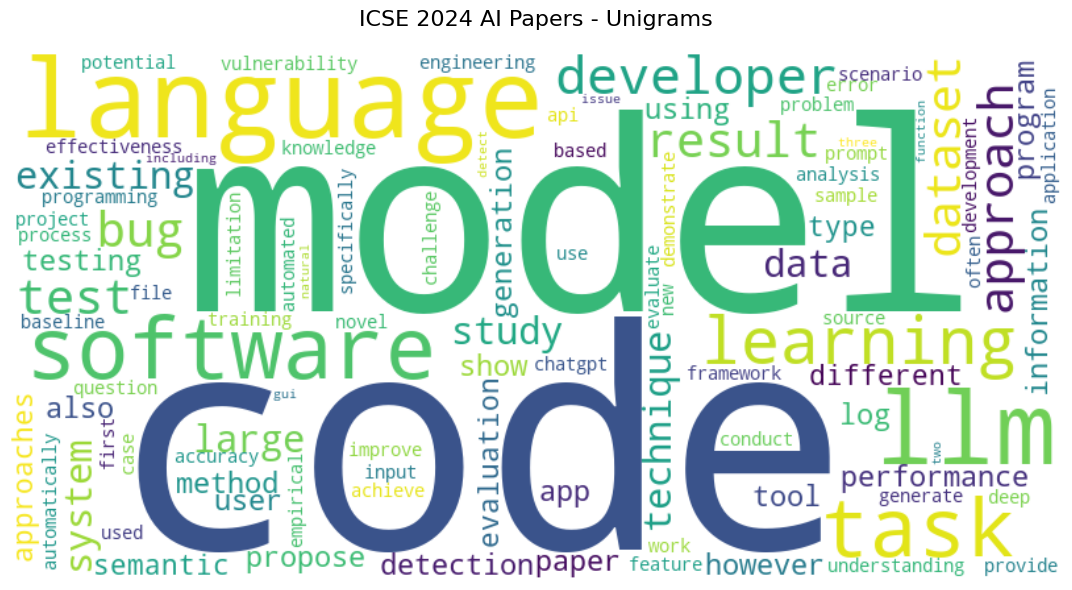


Top 20 most frequent unigrams in 94 AI paper abstracts:
code: 258
models: 118
language: 100
software: 90
learning: 75
model: 71
llms: 69
tasks: 60
developers: 60
results: 58
approach: 58
existing: 55
study: 54
test: 54
large: 53
data: 52
performance: 50
also: 49
paper: 47
testing: 45


In [8]:
print("ICSE 2024 AI Papers Word Cloud (Unigrams):")
freq_2024_unigrams = create_wordcloud_with_ngrams(df_24, "ICSE 2024 AI Papers - Unigrams", use_bigrams=False)

## Bigram Word Clouds

ICSE 2023 AI Papers Word Cloud (Bigrams):


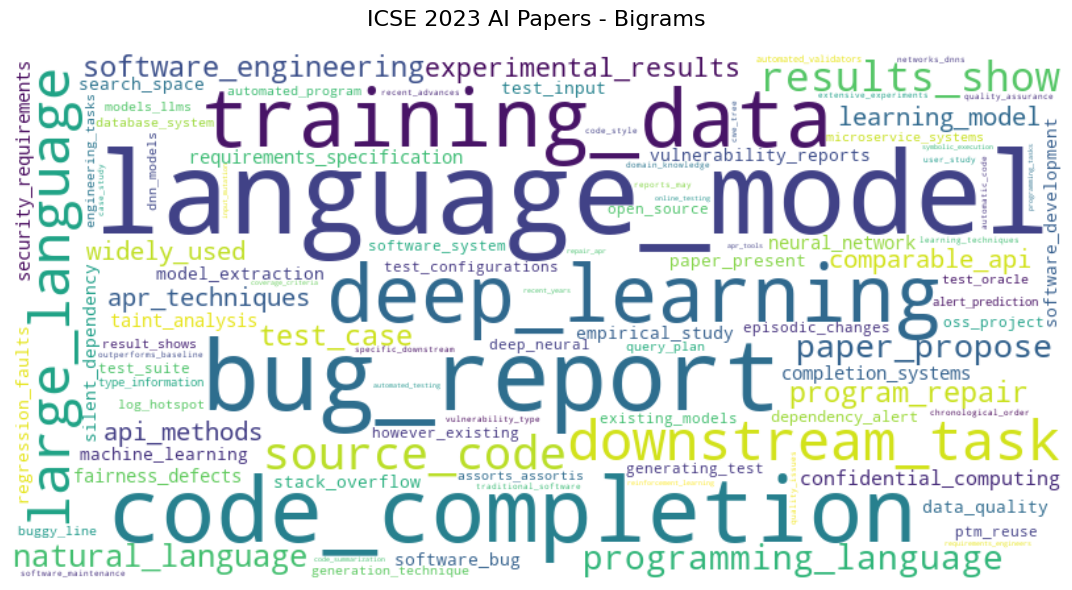


Top 20 most frequent bigrams in 52 AI paper abstracts:
language_models: 17
code_completion: 14
bug_reports: 12
training_data: 11
deep_learning: 11
large_language: 11
source_code: 11
results_show: 10
paper_propose: 9
natural_language: 9
software_engineering: 9
program_repair: 9
experimental_results: 8
downstream_tasks: 7
widely_used: 7
apr_techniques: 7
comparable_api: 7
api_methods: 7
confidential_computing: 7
programming_language: 6


In [9]:
# Create bigram word clouds
print("ICSE 2023 AI Papers Word Cloud (Bigrams):")
freq_2023_bigrams = create_wordcloud_with_ngrams(df_23, "ICSE 2023 AI Papers - Bigrams", use_bigrams=True)

ICSE 2024 AI Papers Word Cloud (Bigrams):


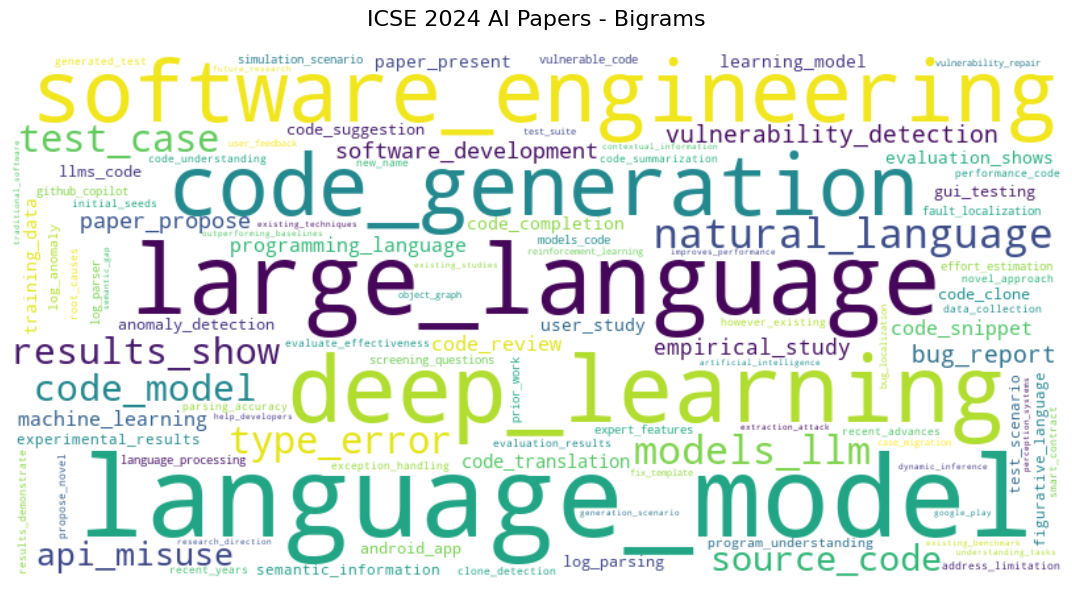


Top 20 most frequent bigrams in 94 AI paper abstracts:
language_models: 38
large_language: 33
deep_learning: 29
software_engineering: 27
code_generation: 26
natural_language: 21
models_llms: 19
results_show: 18
source_code: 17
type_errors: 15
code_models: 14
test_cases: 14
vulnerability_detection: 14
software_development: 13
empirical_study: 12
machine_learning: 11
bug_reports: 11
code_translation: 10
code_review: 10
programming_language: 9


In [10]:
print("ICSE 2024 AI Papers Word Cloud (Bigrams):")
freq_2024_bigrams = create_wordcloud_with_ngrams(df_24, "ICSE 2024 AI Papers - Bigrams", use_bigrams=True)